# Experiments

## Contents
1. [Set-Up](#Set-Up)
2. [Data](#Data)
3. [Summary Statistics](#Summary-Statistics)
4. [Raw Data](#Raw-Data)
5. [Fourier Transform](#Fourier-Transform)

## Set-Up
- Download the [Epileptic Seizure Recognition Data Set](http://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition) and place it in the current directory.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import util

Using TensorFlow backend.
/Users/carolineho 1/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/carolineho 1/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/carolineho 1/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/carolineho 1/.local/lib/python3.7/sit

## Data
We first parse and normalize our dataset.

In [2]:
X, y, ids, chunks = util.parse_data()
n = X.shape[0]
classes = np.unique(y)
num_chunks = np.unique(chunks).shape[0]

# Set up evaluation metrics
scoring = util.get_scoring_metrics(classes)

## Summary Statistics
For our baseline, we use summary statistic features as inputs to our models. From plotting, it seems that minimum and standard deviation may be useful.

In [3]:
X_b = np.concatenate((np.amin(X, axis=1).reshape(n, 1), np.std(X, axis=1).reshape(n, 1)), axis=1)

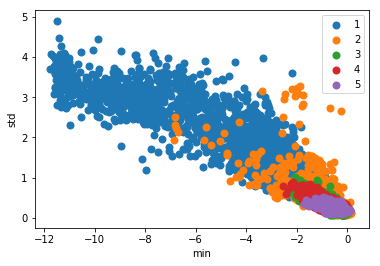

In [4]:
plt.figure()
for c in classes:
    plt.scatter(X_b[y == c, 0], X_b[y == c, 1], linewidth=2, label=str(c))
plt.xlabel('min')
plt.ylabel('std')
plt.legend()
plt.show()

### Softmax

In [5]:
b_train_scores, b_test_scores, b_fold_acc, b_cm = util.evaluate_model(X_b, y, ids, classes, 'sreg', scoring)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:143

In [6]:
b_train_scores

{'accuracy': 0.46475362318840585,
 'f1_macro': 0.4335117180808156,
 'f1_class_1': 0.9044180030769843,
 'f1_class_2': 0.2277938777297642,
 'f1_class_3': 0.12360137776723101,
 'f1_class_4': 0.4299851637023093,
 'f1_class_5': 0.4817601681277896}

In [7]:
b_test_scores

{'accuracy': 0.43417391304347824,
 'f1_macro': 0.39906104581013424,
 'f1_class_1': 0.8725868565985211,
 'f1_class_2': 0.195964451268655,
 'f1_class_3': 0.09174840362103635,
 'f1_class_4': 0.39790067558437947,
 'f1_class_5': 0.4371048419780793}

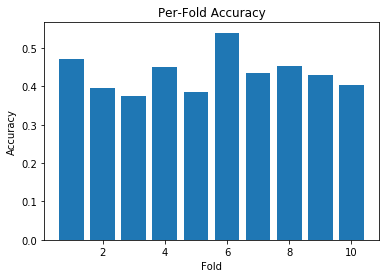

In [8]:
util.plot_fold_accuracy(b_fold_acc)

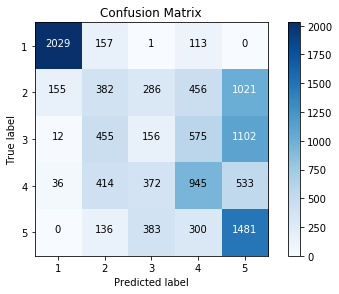

In [9]:
util.visualize_confusion_matrix(b_cm, classes)

### KNN

In [10]:
bk_train_scores, bk_test_scores, bk_fold_acc, bk_cm = util.evaluate_model(X_b, y, chunks, classes, 'knn', scoring)

In [11]:
bk_train_scores

{'accuracy': 0.5910933333333335,
 'f1_macro': 0.5863868137682118,
 'f1_class_1': 0.9179964623239127,
 'f1_class_2': 0.4612668378304826,
 'f1_class_3': 0.45649335058916785,
 'f1_class_4': 0.5307282549068402,
 'f1_class_5': 0.5654491631906551}

In [12]:
bk_test_scores

{'accuracy': 0.47173333333333334,
 'f1_macro': 0.46554180505631415,
 'f1_class_1': 0.9026053712372075,
 'f1_class_2': 0.3041220612876416,
 'f1_class_3': 0.29055546545824923,
 'f1_class_4': 0.39550534350636923,
 'f1_class_5': 0.43492078379210275}

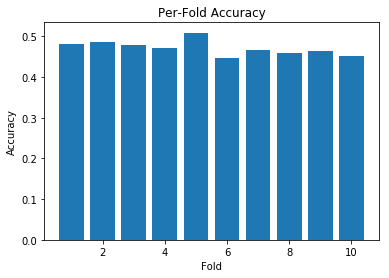

In [13]:
util.plot_fold_accuracy(bk_fold_acc)

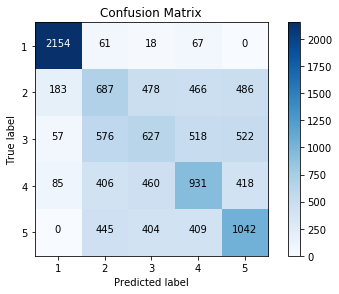

In [14]:
util.visualize_confusion_matrix(bk_cm, classes)

## Raw Data
### Softmax

In [15]:
r_train_scores, r_test_scores, r_fold_acc, r_cm = util.evaluate_model(X, y, ids, classes, 'sreg', scoring)

In [16]:
r_train_scores

{'accuracy': 0.3025507246376812,
 'f1_macro': 0.2747352593594399,
 'f1_class_1': 0.4445431891843417,
 'f1_class_2': 0.19586318253990956,
 'f1_class_3': 0.1877987593748604,
 'f1_class_4': 0.29934120553419374,
 'f1_class_5': 0.2461299601638942}

In [17]:
r_test_scores

{'accuracy': 0.1948695652173913,
 'f1_macro': 0.18641553155274218,
 'f1_class_1': 0.32299246140977134,
 'f1_class_2': 0.12554850524709676,
 'f1_class_3': 0.10203396927924113,
 'f1_class_4': 0.21857941372782505,
 'f1_class_5': 0.1629233080997764}

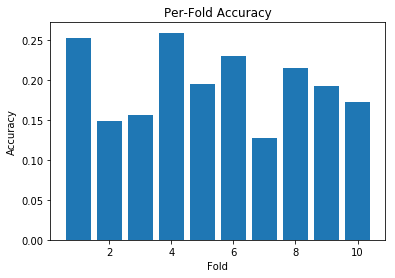

In [18]:
util.plot_fold_accuracy(r_fold_acc)

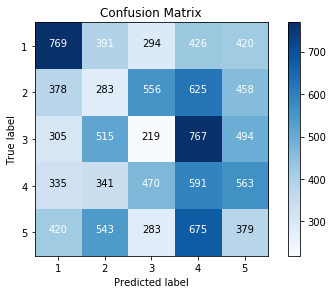

In [19]:
util.visualize_confusion_matrix(r_cm, classes)

### KNN

In [20]:
rk_train_scores, rk_test_scores, rk_fold_acc, rk_cm = util.evaluate_model(X, y, chunks, classes, 'knn', scoring)

In [21]:
rk_train_scores

{'accuracy': 1.0,
 'f1_macro': 1.0,
 'f1_class_1': 1.0,
 'f1_class_2': 1.0,
 'f1_class_3': 1.0,
 'f1_class_4': 1.0,
 'f1_class_5': 1.0}

In [22]:
rk_test_scores

{'accuracy': 0.4404333333333333,
 'f1_macro': 0.45001335568026224,
 'f1_class_1': 0.8034936898955726,
 'f1_class_2': 0.3810260899638166,
 'f1_class_3': 0.39309630767306974,
 'f1_class_4': 0.4601468651769589,
 'f1_class_5': 0.21230382569189343}

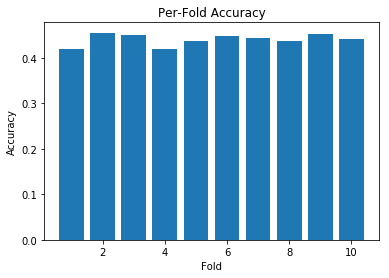

In [23]:
util.plot_fold_accuracy(rk_fold_acc)

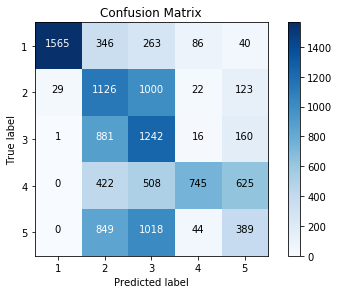

In [24]:
util.visualize_confusion_matrix(rk_cm, classes)

### CNN

In [25]:
X_rc = X.reshape((X.shape[0], X.shape[1], 1))
rc_train_scores, rc_test_scores, rc_fold_acc, rc_cm = util.evaluate_model(X_rc, y, ids, classes, 'cnn', scoring)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/25
10350/10350 [==============================] - 6s 597us/step - loss: 0.9847 - acc: 0.5442
Epoch 2/25
10350/10350 [==============================] - 6s 562us/step - loss: 0.7882 - acc: 0.6418
Epoch 3/25
10350/10350 [==============================] - 7s 668us/step - loss: 0.7314 - acc: 0.6655
Epoch 4/25
10350/10350 [==============================] - 7s 686us/step - loss: 0.6917 - acc: 0.6869
Epoch 5/25
10350/10350 [==============================] - 7s 721us/step - loss: 0.6735 - acc: 0.6900
Epoch 6/25
10350/10350 [==============================] - 7s 647us/step - loss: 0.6536 - acc: 0.7005
Epoch 7/25
10350/10350 [==============================] - 6s 564us/step - loss: 0.6418 - acc: 0.7043
Epoch 8/25
10350/10350 [==============================] - 6s 626us/step - loss: 0.6266 - acc: 0.7104
Epoch 9/25
10350/10350 [==============================] - 8s 735us/step - loss: 0.6152 - ac

KeyboardInterrupt: 

In [ ]:
rc_train_scores

In [ ]:
rc_test_scores

In [ ]:
util.plot_fold_accuracy(rc_fold_acc)

In [ ]:
util.visualize_confusion_matrix(rc_cm, classes)

## Fourier Transform

In [26]:
X_f = np.fft.rfft(X).astype(float)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


### Softmax

In [27]:
f_train_scores, f_test_scores, f_fold_acc, f_cm = util.evaluate_model(X_f, y, ids, classes, 'sreg', scoring)

In [28]:
f_train_scores

{'accuracy': 0.2841352657004831,
 'f1_macro': 0.25449253569474234,
 'f1_class_1': 0.393654171640455,
 'f1_class_2': 0.19208334137227445,
 'f1_class_3': 0.16691101789984303,
 'f1_class_4': 0.2916330205010061,
 'f1_class_5': 0.22818112706013297}

In [29]:
f_test_scores

{'accuracy': 0.18730434782608696,
 'f1_macro': 0.17749712686112568,
 'f1_class_1': 0.295172543952985,
 'f1_class_2': 0.1347132968204156,
 'f1_class_3': 0.0811166442093024,
 'f1_class_4': 0.2241150553612103,
 'f1_class_5': 0.15236809396171508}

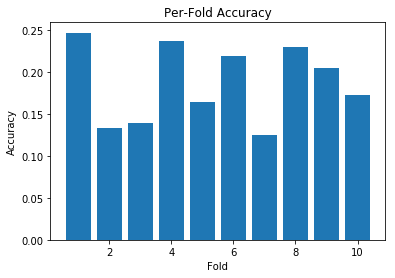

In [30]:
util.plot_fold_accuracy(f_fold_acc)

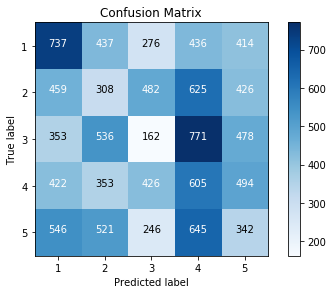

In [31]:
util.visualize_confusion_matrix(f_cm, classes)

### KNN

In [32]:
fk_train_scores, fk_test_scores, fk_fold_acc, fk_cm = util.evaluate_model(X_f, y, chunks, classes, 'knn', scoring)

In [33]:
fk_train_scores

{'accuracy': 1.0,
 'f1_macro': 1.0,
 'f1_class_1': 1.0,
 'f1_class_2': 1.0,
 'f1_class_3': 1.0,
 'f1_class_4': 1.0,
 'f1_class_5': 1.0}

In [34]:
fk_test_scores

{'accuracy': 0.4544,
 'f1_macro': 0.46670395141844034,
 'f1_class_1': 0.7941909253787541,
 'f1_class_2': 0.3809121761910549,
 'f1_class_3': 0.4052885595989699,
 'f1_class_4': 0.4714791841947874,
 'f1_class_5': 0.28164891172863543}

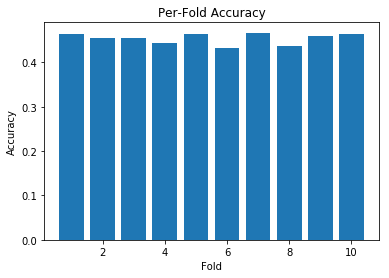

In [35]:
util.plot_fold_accuracy(fk_fold_acc)

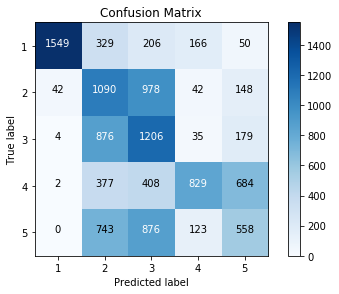

In [36]:
util.visualize_confusion_matrix(fk_cm, classes)

### CNN

In [ ]:
X_fc = X_f.reshape((X_f.shape[0], X_f.shape[1], 1))
fc_train_scores, fc_test_scores fc_fold_acc, fc_cm = util.evaluate_model(X_fc, y, ids, classes, 'cnn', scoring)

In [ ]:
fc_train_scores

In [ ]:
fc_test_scores

In [ ]:
util.plot_fold_accuracy(fc_fold_acc)

In [ ]:
util.visualize_confusion_matrix(fc_cm, classes)